In [10]:
import tensorflow as tf
#(2,1,2)-> two are a rows and columns here,and middle one is an axis  
x=tf.ones(shape=(2,1,2))
v = tf.Variable(initial_value=tf.random.normal(shape=(3, 1)))
#here 3 are a rows and 1 is a columns
v.assign(tf.ones((3, 1)))
#this function will add ones with ones 
v.assign_add(tf.ones((3, 1)))
v

<tf.Variable 'Variable:0' shape=(3, 1) dtype=float32, numpy=
array([[2.],
       [2.],
       [2.]], dtype=float32)>

In [25]:
#using a gradient tape
input_var=tf.Variable(initial_value=3.)
# Use a gradient tape to track operations on the variable
with tf.GradientTape() as tape:
    result=tf.square(input_var)
# Calculate the gradient of `result` with respect to `input_var`
gradient=tape.gradient(result,input_var)

#using a gradient tape
input_const=tf.constant(6.)
with tf.GradientTape() as tape:
    tape.watch(input_const)
    result=tf.square(input_const)
gradient=tape.gradient(result,input_const)

time=tf.Variable(0.)
with tf.GradientTape() as outerTape:
    with tf.GradientTape() as innerTape:
        position=4.9 * time ** 2
    speed=innerTape.gradient(position,time)
    print(speed)
accelaration=outerTape.gradient(speed,time)
print(accelaration)


tf.Tensor(0.0, shape=(), dtype=float32)
tf.Tensor(9.8, shape=(), dtype=float32)


In [ ]:
import numpy as np;
num_samples_per_class=200
#The multivariate normal, multinormal is a generalization of the one-dimensionalnormal distribution to  higher dimensions.
negative_samples=np.random.multivariate_normal(
    mean=[0,3],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class
)
positive_samples=np.random.multivariate_normal(
    mean=[3,0],
    cov=[[1,0.5],[0.5,1]],
    size=num_samples_per_class
)
inputs=np.vstack((negative_samples,positive_samples)).astype(np.float32)
# Create the targets (0 for negative samples, 1 for positive samples)
targets = np.vstack((
    np.zeros((num_samples_per_class, 1), dtype="float32"),  # Class 0 (negative)
    np.ones((num_samples_per_class, 1), dtype="float32")    # Class 1 (positive)
))


tf.Tensor(
[[1.81384 ]
 [9.163021]], shape=(2, 1), dtype=float32) grad_loss_wrt_W
tf.Tensor([2.3883057], shape=(1,), dtype=float32) grad_loss_wrt_b
Loss at step 0: 4.0781
tf.Tensor(
[[-2.4218764]
 [-1.4903717]], shape=(2, 1), dtype=float32) grad_loss_wrt_W
tf.Tensor([-1.3418063], shape=(1,), dtype=float32) grad_loss_wrt_b
Loss at step 1: 0.4930
tf.Tensor(
[[0.9812282]
 [0.8564506]], shape=(2, 1), dtype=float32) grad_loss_wrt_W
tf.Tensor([0.10872594], shape=(1,), dtype=float32) grad_loss_wrt_b
Loss at step 2: 0.1886
tf.Tensor(
[[-0.30361038]
 [-0.2329349 ]], shape=(2, 1), dtype=float32) grad_loss_wrt_W
tf.Tensor([-0.4662907], shape=(1,), dtype=float32) grad_loss_wrt_b
Loss at step 3: 0.1306
tf.Tensor(
[[0.22177936]
 [0.19758219]], shape=(2, 1), dtype=float32) grad_loss_wrt_W
tf.Tensor([-0.21127295], shape=(1,), dtype=float32) grad_loss_wrt_b
Loss at step 4: 0.1131
tf.Tensor(
[[0.00317784]
 [0.01650911]], shape=(2, 1), dtype=float32) grad_loss_wrt_W
tf.Tensor([-0.2952482], shape=(1,), dt

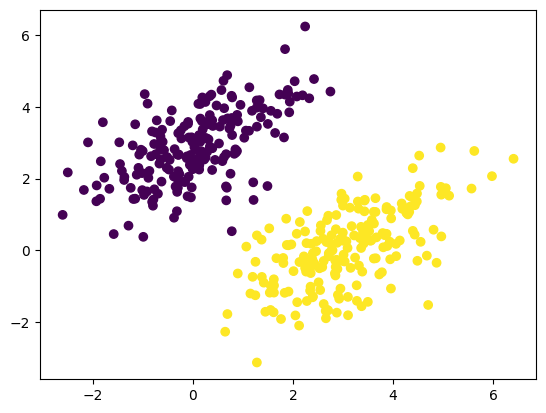

In [13]:
#This code is a simple example of how to implement supervised learning for a binary classification problem using linear regression and gradient descent in TensorFlow. 
import tensorflow as tf
import matplotlib.pyplot as plt
# a basic linear regression model in TensorFlow to classify points in 2D space
# linear regression model -a data analysis technique that predicts the value of unknown data by using another related
# and known data value, It is a statistical method used in data science and machine learning for predictive analysis.

# the input will be in 2D points 
input_dim=2 #Each sample has two features (e.g., x and y coordinates).
# output predicted will be single score per sample.close to 0 if sample is in class 0 and close to 1 if sample is in class1
# class 0  and class 1 is binary classification problem.where as class 0 is negative and class1 is positive


output_dim=1  #The model outputs a single value, which is a prediction of the likelihood of a point belonging to Class 1.

#W is an random number with shape as 2, 1 so 2 rows and 1 columns [[W1],[W2]]
W=tf.Variable(tf.random.uniform(shape=(input_dim,output_dim)))

#Whereas B is a zero with shape 1, array is [0.]
# B is the bias term, initialized to zero, and it shifts the prediction result by a constant.
b=tf.Variable(tf.zeros(shape=(output_dim)))

# Forward pass inputs are [x,y]
#This model function computes the predictional value using linear equations.
def model(inputs):
    return tf.matmul(inputs,W)+b # predictions = [[W1],[W2]] * [x,y] +b = W1 * x + w2 * y + b

# Loss Function
# The loss function is the mean squared error(MSE),which measures how far the predicted values are from the true targets (0 or 1).
def square_loss(targets,predictions):
    per_sample_losses= tf.square(targets-predictions)
    return tf.reduce_mean(per_sample_losses)
#Controls how much the weights and bias are updated during each training step. A higher learning rate leads to larger updates, 
#while a lower learning rate leads to smaller updates.
learning_rate=0.1
#The training step implements the optimization using gradient descent
def training_step(inputs,targets):
#tf.GradientTape is used to record the operations needed to compute the gradients of the loss with respect to the weights and bias.
    with tf.GradientTape() as tape:
        predictions=model(inputs) #call forward pass function
        loss=square_loss(predictions,targets) #call loss function
    grad_loss_wrt_W, grad_loss_wrt_b = tape.gradient(loss,[W,b])
    print(grad_loss_wrt_W,"grad_loss_wrt_W")
    print(grad_loss_wrt_b,"grad_loss_wrt_b")
    #The weights and bias are updated by subtracting the product of the gradients and the learning rate
    W.assign_sub(grad_loss_wrt_W * learning_rate)
    b.assign_sub(grad_loss_wrt_b * learning_rate)
    return loss

#Steps
#1.Initialization: Weights and bias , weights randomly and bias is initialized as 1.
#2.ForwardPass: It will give the predictions
#3.Loss function: MSE computes the difference between the predicticted score and true value
#4.Parameter Update: This model updates its weights and bias by calculating the gradients of the loss with respect to 
# the parameters and adjusting them in order to reduce the loss.
#5.Iteration:This process repeats many iterations , progressively reducing the loss score and improving the model predictions

for step in range(40) :
    loss= training_step(inputs,targets)
    print(f"Loss at step {step}: {loss:.4f}")
predictions = model(inputs)
plt.scatter(inputs[:, 0], inputs[:, 1], c=predictions[:, 0] > 0.5)
plt.show()